In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

root_path = f".."
data_path = f"{root_path}/data"
data_olist_path = f"{data_path}/olist"

In [4]:
df_raw = pd.read_csv(f"{data_olist_path}/complete_orders.csv",parse_dates=["order_estimated_delivery_date","order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                              "order_delivered_customer_date", "shipping_limit_date"]).iloc[:, 1:]
df_raw.head()


customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  a20e8105f23924cd00833fd87daa0831    delivered      2017-08-15 18:29:31   
2  26c7ac168e1433912a51b924fbd34d34    delivered      2017-08-02 18:24:47   
3  53904ddbea91e1e92b2b3f1d09a7af86    delivered      2017-10-23 23:26:46   
4  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   

    order_approved_at order_delivered_carrier_date  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00   
1 2017-08-15 20:05:16          2017-08-17 15:28:33   
2 2017-08-02 18:43:15          2017-08-04 17:35:43   
3 2017-10-25 02:14:11          2017-10-27 16:48:46   
4 2018-07-26 03:24:27          2018-07-26 14:31:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-10 21:25:13                    2017-10-18   
1           2017-08-18 14:44:43                    2017-08-28   
2           2017-08-07 18:30:01                    2017-08-15   
3           2017-11-07 18:04:59                    2017-11-13   
4           2018-08-07 15:27:45                    2018-08-13   

                 customer_unique_id  zip_code_prefix_customer  customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149      sao paulo   
1  3a51803cc0d012c3b5dc8b7528cb05f7                      3366      sao paulo   
2  ef0996a1a279c26e7ecbd737be23d235                      2290      sao paulo   
3  e781fdcc107d13d865fc7698711cc572                     88032  florianopolis   
4  af07308b275d755c9edb36a90c618231                     47813      barreiras   

  customer_state  geolocation_lat_customer  geolocation_lng_customer  \
0             SP                -23.583452                -46.586284   
1             SP                -23.564977                -46.536043   
2             SP                -23.532175                -46.626106   
3             SC                -27.553442                -48.500027   
4             BA                -12.124719                -45.011148   

                          seller_id  zip_code_prefix_seller     seller_city  \
0  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
1  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
2  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
3  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
4  289cdb325fb7e7f891c38608bf9e0962                   31570  belo horizonte   

  seller_state  geolocation_lat_seller  geolocation_lng_seller  order_item_id  \
0           SP              -23.675542              -46.442547              1   
1           SP              -23.675542              -46.442547              1   
2           SP              -23.675542              -46.442547              1   
3           SP              -23.675542              -46.442547              1   
4           SP              -19.813375              -43.984022              1   

                         product_id shipping_limit_date   price  \
0  87285b34884572647811a353c7ac498a 2017-10-06 11:07:15   29.99   
1  87285b34884572647811a353c7ac498a 2017-08-21 20:05:16   29.99   
2  87285b34884572647811a353c7ac498a 2017-08-08 18:37:31   29.99   
3  87285b34884572647811a353c7ac498a 2017-10-31 02:14:11   29.99   
4  595fac2a385ac33a80bd5114aec74eb8 2018-07-30 03:24:27  118.70   

   freight_value  review_score payment_type  payment_installments  \
0           8.72             4      voucher                     1   
1           7.78             4  credit_card                     3   
2           7.78             5  credit_card                     1   
3          14.10             3       boleto                     1   
4          22.76             4       boleto                     1   

  product_category_name_english  
0                    housewares  
1                    housewares  
2                    housewares  
3              

## 전처리
1) 이상치 제거 및 파생변수 만들기

In [7]:
df_cor = df_raw.copy()

col_list = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "review_score",
]
dt_list = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]
deri_list = ["delivered_purchase", "estimated_purchase", "delivered_estimated"]

df_cor = df_cor.copy()

for i in dt_list:
    df_cor[i] = pd.to_datetime(df_cor[i])

df_cor["delivered_purchase"] = (
    df_cor["order_delivered_customer_date"] - df_cor["order_purchase_timestamp"]
)

df_cor["estimated_purchase"] = (
    df_cor["order_estimated_delivery_date"] - df_cor["order_purchase_timestamp"]
)

df_cor["delivered_estimated"] = (
    df_cor["order_delivered_customer_date"] - df_cor["order_estimated_delivery_date"]
)

# EDA.Check_df(df_cor)
# EDA.Summary_df(df_cor)

In [8]:
df_cor_outlierDrop = df_cor.copy()
df_cor_outlierDrop = df_cor_outlierDrop[
    df_cor_outlierDrop["delivered_purchase"] < "30 days 00:00:00"
]

print("df_cor_outlierDrop 행의 수 :", df_cor_outlierDrop.shape[0])
print("제거 된 행의 수 :", df_cor.shape[0] - df_cor_outlierDrop.shape[0])

display(df_cor_outlierDrop.describe().T)

df_cor_outlierDrop 행의 수 : 88331
제거 된 행의 수 : 4326


count                          mean  \
zip_code_prefix_customer  88331.0                  34495.071606   
geolocation_lat_customer  88331.0                     -21.37355   
geolocation_lng_customer  88331.0                    -46.258628   
zip_code_prefix_seller    88331.0                  24732.775741   
geolocation_lat_seller    88331.0                    -22.805442   
geolocation_lng_seller    88331.0                    -47.228028   
order_item_id             88331.0                      1.126207   
price                     88331.0                    123.847706   
freight_value             88331.0                     19.789815   
review_score              88331.0                      4.248452   
payment_installments      88331.0                      2.894386   
delivered_purchase          88331    11 days 03:33:32.608936839   
estimated_purchase          88331    23 days 10:24:43.001766084   
delivered_estimated         88331  -13 days +17:08:49.607170756   

                                                std                  min  \
zip_code_prefix_customer               29836.033025               1004.0   
geolocation_lat_customer                   5.372696            -33.69155   
geolocation_lng_customer                   3.953438           -72.664409   
zip_code_prefix_seller                  27818.51611               1001.0   
geolocation_lat_seller                     2.739558           -32.095725   
geolocation_lng_seller                     2.358789           -63.895935   
order_item_id                              0.510914                  1.0   
price                                    186.922644                 0.85   
freight_value                             15.286454                  0.0   
review_score                               1.193607                  1.0   
payment_installments                       2.692047                  0.0   
delivered_purchase        6 days 04:23:00.482135426      0 days 12:48:07   
estimated_purchase        8 days 14:58:17.103657469      2 days 00:11:32   
delivered_estimated       7 days 23:52:45.653950951  -147 days +23:36:47   

                                                25%                 50%  \
zip_code_prefix_customer                     9961.0             23510.0   
geolocation_lat_customer                 -23.594487           -22.93796   
geolocation_lng_customer                 -48.101237          -46.638626   
zip_code_prefix_seller                       6429.0             13568.0   
geolocation_lat_seller                   -23.617116          -23.424571   
geolocation_lng_seller                   -48.810282          -46.750102   
order_item_id                                   1.0                 1.0   
price                                          40.0                78.0   
freight_value                                 13.07               16.18   
review_score                                    4.0                 5.0   
payment_installments                            1.0                 2.0   
delivered_purchase           6 days 12:52:17.500000     9 days 23:04:22   
estimated_purchase                 18 days 03:23:21    23 days 01:39:51   
delivered_estimated       -17 days +14:49:19.500000  -13 days +19:52:45   

                                              75%                max  
zip_code_prefix_customer                  57038.5            99980.0  
geolocation_lat_customer               -20.298699          42.184003  
geolocation_lng_customer               -43.888193          -4.947823  
zip_code_prefix_seller                    29156.0            99730.0  
geolocation_lat_seller                 -21.754867          -2.505689  
geolocation_lng_seller                 -46.521292         -34.853742  
order_item_id                                 1.0               21.0  
price                                       139.0             6735.0  
freight_value                               20.98             409.68  
review_score                                 

In [9]:
df_cor

customer_id order_status order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1      a20e8105f23924cd00833fd87daa0831    delivered      2017-08-15 18:29:31   
2      26c7ac168e1433912a51b924fbd34d34    delivered      2017-08-02 18:24:47   
3      53904ddbea91e1e92b2b3f1d09a7af86    delivered      2017-10-23 23:26:46   
4      b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
...                                 ...          ...                      ...   
92652  ddfdf5e9b2659e1fbd073404c9b762e0    delivered      2018-03-02 17:12:05   
92653  609b9fb8cad4fe0c7b376f77c8ab76ad    delivered      2017-08-10 21:21:07   
92654  a2f7428f0cafbc8e59f20e1444b67315    delivered      2017-12-20 09:52:41   
92655  39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
92656  edb027a75a1449115f6b43211ae02a24    delivered      2018-03-08 20:57:30   

        order_approved_at order_delivered_carrier_date  \
0     2017-10-02 11:07:15          2017-10-04 19:55:00   
1     2017-08-15 20:05:16          2017-08-17 15:28:33   
2     2017-08-02 18:43:15          2017-08-04 17:35:43   
3     2017-10-25 02:14:11          2017-10-27 16:48:46   
4     2018-07-26 03:24:27          2018-07-26 14:31:00   
...                   ...                          ...   
92652 2018-03-02 17:49:24          2018-03-06 21:23:32   
92653 2017-08-10 21:35:26          2017-08-18 16:42:51   
92654 2017-12-20 10:09:52          2017-12-20 20:25:25   
92655 2017-03-09 09:54:05          2017-03-10 11:18:03   
92656 2018-03-09 11:20:28          2018-03-09 22:11:59   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-10-10 21:25:13                    2017-10-18   
1               2017-08-18 14:44:43                    2017-08-28   
2               2017-08-07 18:30:01                    2017-08-15   
3               2017-11-07 18:04:59                    2017-11-13   
4               2018-08-07 15:27:45                    2018-08-13   
...                             ...                           ...   
92652           2018-03-16 17:21:55                    2018-03-21   
92653           2017-08-23 15:36:29                    2017-08-31   
92654           2018-01-26 15:45:14                    2018-01-18   
92655           2017-03-17 15:08:01                    2017-03-28   
92656           2018-03-16 13:08:30                    2018-04-03   

                     customer_unique_id  zip_code_prefix_customer  \
0      7c396fd4830fd04220f754e42b4e5bff                      3149   
1      3a51803cc0d012c3b5dc8b7528cb05f7                      3366   
2      ef0996a1a279c26e7ecbd737be23d235                      2290   
3      e781fdcc107d13d865fc7698711cc572                     88032   
4      af07308b275d755c9edb36a90c618231                     47813   
...                                 ...                       ...   
92652  490c3c53ca927221bccbb00706afbcf9                      2042   
92653  fb9310710003399b031add3e55f34719                      3318   
92654  a49e8e11e850592fe685ae3c64b40eca                     83870   
92655  6359f309b166b0196dbf7ad2ac62bb5a                     12209   
92656  60350aa974b26ff12caad89e55993bd6                     83750   

             customer_city customer_state  geolocation_lat_customer  \
0                sao paulo             SP                -23.583452   
1                sao paulo             SP                -23.564977   
2                sao paulo             SP                -23.532175   
3            florianopolis             SC                -27.553442   
4                barreiras             BA                -12.124719   
...                    ...            ...                       ...   
92652            sao paulo             SP                -23.487163   
92653            sao paulo             SP                -23.544357   
92654     campo do tenente             PR                -25.

In [182]:
df_cor = df_cor[df_cor["order_status"]=="delivered"]
df_cor.rename(columns = {'product_category_name_english':'product_category'}, inplace = True)
df_cor["delivery_period"]=df_cor["delivered_purchase"].dt.days

## 1. 주문량이 많은TOP 10 도시의 주요 주문 제품

[Text(0.5, 1.0, '주문량 TOP10 도시')]

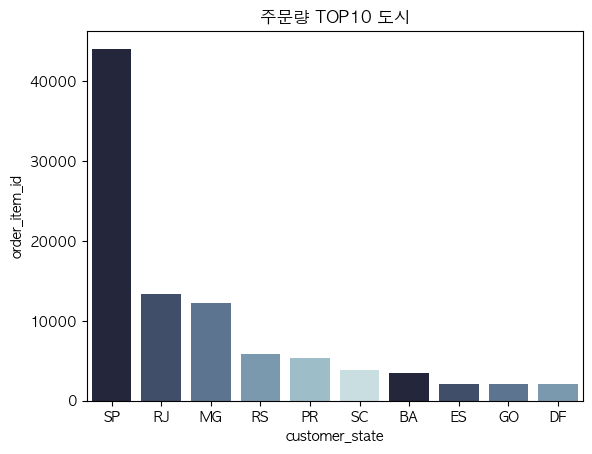

In [83]:
plt.rcParams['font.family'] = 'AppleGothic'
color = sns.cubehelix_palette(rot=-.2,reverse=True)

df_city = df_cor.groupby(["customer_state"])["order_item_id"].sum().sort_values(ascending = False).head(10).reset_index()
sns.barplot(data=df_city,x="customer_state", y="order_item_id",palette= color).set(title="주문량 TOP10 도시")




[Text(0.5, 1.0, '주문 품목')]

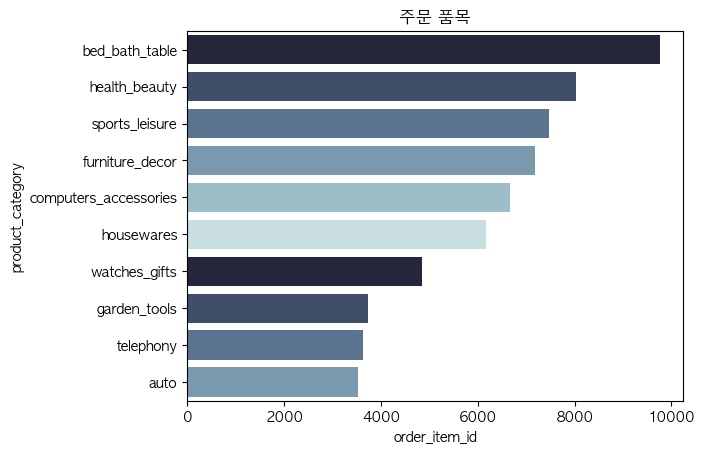

In [253]:
df_main = df_new[df_new["customer_state"].str.contains('SP|RJ|MG|RS|PR|SC|BA|ES|GO|DF')].groupby("product_category")["order_item_id"].sum().sort_values(ascending = False).reset_index().head(10)
df_main
sns.barplot(data=df_main, y="product_category",x = "order_item_id",palette=color).set(title="주문 품목")

In [188]:
df_new = df_cor[df_cor["customer_state"].str.contains('SP|RJ|MG|RS|PR|SC|BA|ES|GO|DF')]
df_new.head()

customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  a20e8105f23924cd00833fd87daa0831    delivered      2017-08-15 18:29:31   
2  26c7ac168e1433912a51b924fbd34d34    delivered      2017-08-02 18:24:47   
3  53904ddbea91e1e92b2b3f1d09a7af86    delivered      2017-10-23 23:26:46   
4  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   

    order_approved_at order_delivered_carrier_date  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00   
1 2017-08-15 20:05:16          2017-08-17 15:28:33   
2 2017-08-02 18:43:15          2017-08-04 17:35:43   
3 2017-10-25 02:14:11          2017-10-27 16:48:46   
4 2018-07-26 03:24:27          2018-07-26 14:31:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-10 21:25:13                    2017-10-18   
1           2017-08-18 14:44:43                    2017-08-28   
2           2017-08-07 18:30:01                    2017-08-15   
3           2017-11-07 18:04:59                    2017-11-13   
4           2018-08-07 15:27:45                    2018-08-13   

                 customer_unique_id  zip_code_prefix_customer  customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149      sao paulo   
1  3a51803cc0d012c3b5dc8b7528cb05f7                      3366      sao paulo   
2  ef0996a1a279c26e7ecbd737be23d235                      2290      sao paulo   
3  e781fdcc107d13d865fc7698711cc572                     88032  florianopolis   
4  af07308b275d755c9edb36a90c618231                     47813      barreiras   

  customer_state  geolocation_lat_customer  geolocation_lng_customer  \
0             SP                -23.583452                -46.586284   
1             SP                -23.564977                -46.536043   
2             SP                -23.532175                -46.626106   
3             SC                -27.553442                -48.500027   
4             BA                -12.124719                -45.011148   

                          seller_id  zip_code_prefix_seller     seller_city  \
0  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
1  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
2  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
3  3504c0cb71d7fa48d967e0e4c94d59d9                    9350            maua   
4  289cdb325fb7e7f891c38608bf9e0962                   31570  belo horizonte   

  seller_state  geolocation_lat_seller  geolocation_lng_seller  order_item_id  \
0           SP              -23.675542              -46.442547              1   
1           SP              -23.675542              -46.442547              1   
2           SP              -23.675542              -46.442547              1   
3           SP              -23.675542              -46.442547              1   
4           SP              -19.813375              -43.984022              1   

                         product_id shipping_limit_date   price  \
0  87285b34884572647811a353c7ac498a 2017-10-06 11:07:15   29.99   
1  87285b34884572647811a353c7ac498a 2017-08-21 20:05:16   29.99   
2  87285b34884572647811a353c7ac498a 2017-08-08 18:37:31   29.99   
3  87285b34884572647811a353c7ac498a 2017-10-31 02:14:11   29.99   
4  595fac2a385ac33a80bd5114aec74eb8 2018-07-30 03:24:27  118.70   

   freight_value  review_score payment_type  payment_installments  \
0           8.72             4      voucher                     1   
1           7.78             4  credit_card                     3   
2           7.78             5  credit_card                     1   
3          14.10             3       boleto                     1   
4          22.76             4       boleto                     1   

  product_category delivered_purchase estimated_purchase delivered_estimated  \
0       housewares    8 days 10:28:40   15 days 13:03:27   -8 days +21:

## 2.주요 도시 내의 운임, 배송기간과 관련하여 분석
### 1) 배송시간이 평균보다 더 걸림 ->빼기

In [186]:
# 전 품목의 평균 배송 기간 -> 13일
df_new.groupby(["customer_state","product_category"])["delivered_purchase"].mean().describe()

count                           637
mean     13 days 19:40:00.838528710
std       4 days 09:20:31.941690606
min                 2 days 02:43:27
25%      11 days 07:01:02.837593985
50%      13 days 12:00:43.818181818
75%      16 days 00:37:02.428571428
max                47 days 01:57:49
Name: delivered_purchase, dtype: object

In [189]:
# 품목별 평균 배송시간
# tel = df_new.groupby(["customer_state","product_category"])["delivery_period"].mean().reset_index()
tel = df_new.groupby("product_category")["delivery_period"].mean().reset_index().sort_values(by = "delivery_period",ascending = False)
tel

product_category  delivery_period
57                         office_furniture        19.117593
46                           home_comfort_2        14.714286
31                            fashion_shoes        13.902564
12                       christmas_supplies        13.287037
45                        home_appliances_2        13.110000
41        furniture_mattress_and_upholstery        13.057143
38                        furniture_bedroom        13.000000
40                    furniture_living_room        12.744048
33                  fashion_underwear_beach        12.663551
42                             garden_tools        12.504445
47                             home_confort        12.411594
48                        home_construction        12.394673
7                            bed_bath_table        12.162722
4                                     audio        12.145631
16                           consoles_games        12.133787
15                    computers_accessories        12.073609
39                          furniture_decor        11.989849
25                             dvds_blu_ray        11.760870
30                    fashion_male_clothing        11.730000
26                              electronics        11.608634
27                   fashio_female_clothing        11.575758
66                               stationery        11.546606
67                   tablets_printing_image        11.542373
56                      musical_instruments        11.537879
14                                computers        11.412214
6                                      baby        11.390999
70                            watches_gifts        11.268287
68                                telephony        11.214539
21                 costruction_tools_garden        11.209150
20                               cool_stuff        11.153138
65                           sports_leisure        11.029131
51  kitchen_dining_laundry_garden_furniture        11.013825
61                    security_and_services        11.000000
22                  costruction_tools_tools        10.988764
35                                  flowers        10.961538
1                          air_conditioning        10.924444
54                             market_place        10.901345
34                          fixed_telephony        10.880435
5                                      auto        10.870015
8                    books_general_interest        10.661905
59                                perfumery        10.595212
43                            health_beauty        10.480707
69                                     toys        10.442232
60                                 pet_shop        10.302929
19                construction_tools_safety        10.276923
44                          home_appliances        10.264881
49                               housewares        10.212428
63                         small_appliances        10.137112
55                                    music        10.085714
2                                       art        10.011299
62                   signaling_and_security         9.967213
50           industry_commerce_and_business         9.933673
0                agro_industry_and_commerce         9.922078
28                 fashion_bags_accessories         9.884856
17          construction_tools_construction         9.845566
37                               food_drink         9.835000
23                      diapers_and_hygiene         9.826087
10                          books_technical         9.746606
11                        cds_dvds_musicals         9.727273
24                                   drinks         9.607547
53                      luggage_accessories         9.601344
13                               cine_photo         9.226415
32                            fashion_sport         9.173913
64    small_appliances_home_oven_and_coffee         9.092308
18                construction_tools_lights         8.843602
3

In [191]:
# 배송시간 평균이상 도시,품목 리스트

tel_2 = tel[tel["delivery_period"]>13]
tel_2

product_category  delivery_period
57                   office_furniture        19.117593
46                     home_comfort_2        14.714286
31                      fashion_shoes        13.902564
12                 christmas_supplies        13.287037
45                  home_appliances_2        13.110000
41  furniture_mattress_and_upholstery        13.057143

In [195]:
## 안써요
df_3 = tel_2[["customer_state","delivery_period","product_category"]].sort_values(by = "delivery_period",ascending = False).head(30)
df_avg=df_3.groupby(["product_category"]).mean().sort_values(by = "delivery_period",ascending = False).head().reset_index()

df_avg

KeyError: "['customer_state'] not in index"

<AxesSubplot:xlabel='delivery_period', ylabel='product_category'>

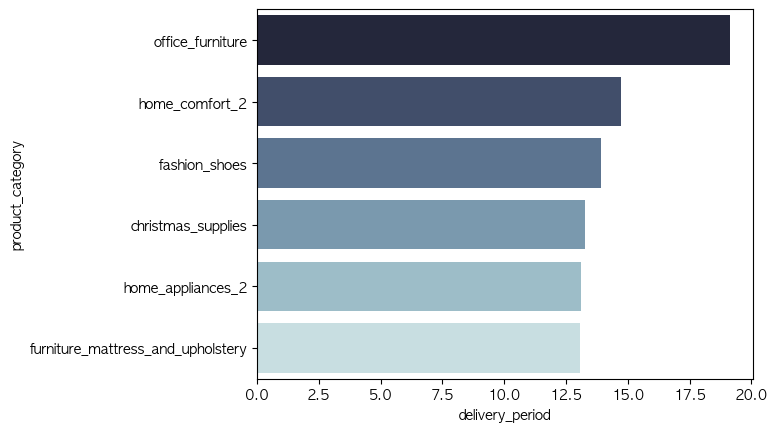

In [213]:
#안써요
sns.barplot(data=tel_2, y="product_category",x="delivery_period",palette=color)

### 2) 배송 운임 비쌈, 배송 빠름

In [267]:
df_fr = df_new[["product_category","freight_value","delivery_period"]].sort_values(by=["freight_value","delivery_period"],ascending = [False,True]).head(50)

# df_fr.groupby("product_category")[["freight_value","delivery_period"]].mean().sort_values(by=["freight_value","delivery_period"],ascending = [False,True])
df_fr =df_fr.drop_duplicates(["product_category"])
df_fr

product_category  freight_value  delivery_period
46892                               housewares         375.28                8
44386                            health_beauty         322.10               18
57237          construction_tools_construction         321.46                7
79627                                     baby         306.06                6
85415                      musical_instruments         294.76                9
46198                         office_furniture         256.13                6
84471                           sports_leisure         252.35                5
32373                                      art         227.66               11
74067                           bed_bath_table         225.71               10
87052                               stationery         222.38               16
60894  kitchen_dining_laundry_garden_furniture         214.86                9
64688                          furniture_decor         213.53               22
49222                            watches_gifts         209.63               21
86668                                 pet_shop         196.94               19
45284                         small_appliances         195.76               15
76056                   signaling_and_security         191.11                9
88304                    furniture_living_room         187.43               20
35461                                     auto         186.38               47
40948                                     toys         178.33                9
52448                               cool_stuff         174.95               12

### 3) 배송 운임 저렴, 배송 느림

In [266]:
df_fd = df_new[["product_category","freight_value","delivery_period"]].sort_values(by=["freight_value","delivery_period"],ascending = [True,False]).head(50)

# df_fd.groupby("product_category")[["freight_value","delivery_period"]].mean().sort_values(by=["freight_value","delivery_period"],ascending = [True,False])[1:30]
df_fd =df_fd.drop_duplicates(["product_category"])
df_fd

product_category  freight_value  delivery_period
17820     garden_tools            0.0               36
1190   furniture_decor            0.0               31
9452     watches_gifts            0.0               30
18359             auto            0.0               20

In [268]:
h = pd.concat([df_avg,df_fr,df_fd,df_main], axis=0)
h.groupby("product_category")["product_category"].count().sort_values(ascending=False)

product_category
watches_gifts                              3
furniture_decor                            3
auto                                       3
sports_leisure                             2
health_beauty                              2
garden_tools                               2
housewares                                 2
bed_bath_table                             2
cool_stuff                                 1
furniture_living_room                      1
construction_tools_construction            1
computers_accessories                      1
kitchen_dining_laundry_garden_furniture    1
musical_instruments                        1
office_furniture                           1
pet_shop                                   1
signaling_and_security                     1
small_appliances                           1
baby                                       1
stationery                                 1
telephony                                  1
toys                                  

[Text(0.5, 1.0, '최종 품목')]

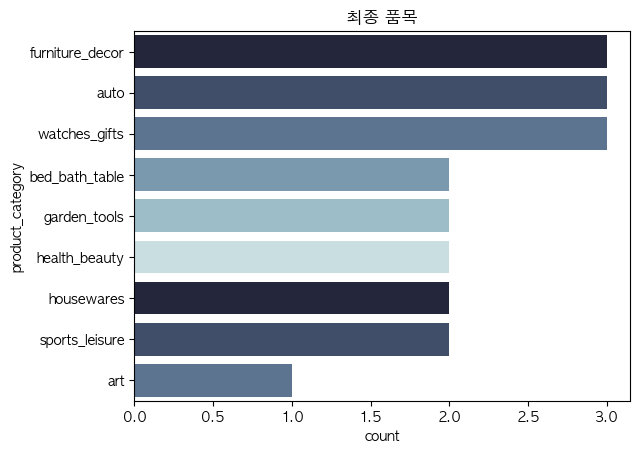

In [271]:
sns.countplot(data=h, y= "product_category",palette=color,order = h['product_category'].value_counts().index[:9]).set(title="최종 품목")